In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import numpy as np
from datetime import datetime

In [2]:
ao3_df= pd.read_csv('data/MyAO3Historydata_Final.csv')
ao3_df

,Title,Author,Fandom Tags,Relationship Tags,Character Tags,Freeform Tags,Summary,Language,Chapters,Words,Collections,Kudos,Bookmarks,Hits,Comments,Latest View,Link
0,"better days, satoru",uhsato,"呪術廻戦 | Jujutsu Kaisen (Manga), 呪術廻戦 | Jujutsu ...",Aizawa Shouta | Eraserhead & Gojo Satoru,"Aizawa Shouta | Eraserhead, Gojo Satoru, Origi...","Gojo Satoru is a Little Shit, Gojo Satoru Need...","""why would I want to be rescued by someone who...",English,10/?,"26,733",0,"2,322",507,"42,255",177,Last visited: 26 Aug 2025 (Latest version.) Vi...,https://archiveofourown.org/works/46834918
1,A Blessing In Disguise,Hokkaido_milk_pudding,"呪術廻戦 | Jujutsu Kaisen (Manga), 僕のヒーローアカデミア | B...","Fushiguro Toji/Todoroki Rei, Fushiguro Megumi ...","Fushiguro Toji, Todoroki Rei, Fushiguro Megumi...","Fushiguro Toji Lives, Rei is Megumi's Mother, ...",Toji never intended to have so many kids. He h...,English,23/?,"111,711",21,"3,810","1,310","132,170",705,Last visited: 26 Aug 2025 (Latest version.) Vi...,https://archiveofourown.org/works/36102247
2,To The Life I Could Have Led,Hokkaido_milk_pudding,"呪術廻戦 | Jujutsu Kaisen (Manga), 呪術廻戦 | Jujutsu ...","Fushiguro Toji/Todoroki Rei, Fushiguro Megumi ...","Fushiguro Toji, Todoroki Rei, Fushiguro Megumi...","Crossover, Crossovers & Fandom Fusions, Crosso...",With Megumi and Touya about to set off to Juju...,English,2/?,"8,164",2,"1,046",232,"17,213",126,Last visited: 26 Aug 2025 (Latest version.) Vi...,https://archiveofourown.org/works/50856163
3,Are You My Family?,LadyDyDy35,"Boruto (Anime & Manga), Naruto (Anime & Manga)","Gaara/Haruno Sakura, Gaara & Shinki (Naruto), ...","Gaara (Naruto), Haruno Sakura, Shinki (Boruto)...","Shinki-centric, Angst with a Happy Ending, Gro...",Shinki isn't dumb; he knows the Suna Council i...,English,1/1,"9,956",0,73,5,740,8,Last visited: 26 Aug 2025 (Latest version.) Vi...,https://archiveofourown.org/works/65654701
4,Brotherly Bonds,LadyDyDy35,"Naruto (Anime & Manga), Boruto (Anime & Manga)","Gaara/Haruno Sakura, Shinki & Uchiha Sarada, G...","Shinki (Boruto), Uchiha Sarada, Gaara (Naruto)...","Established Relationship, GaaSaku - Freeform, ...",Sarada takes her duties as Shinki's younger si...,English,1/1,"4,999",0,50,3,462,0,Last visited: 26 Aug 2025 (Latest version.) Vi...,https://archiveofourown.org/works/67330183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8490,Haruno Sakura: Omake,Jememe,"Naruto, Boruto: Naruto Next Generations","Haruno Sakura/Hatake Kakashi, Hyuuga Hinata/Uz...","Haruno Sakura, Hatake Kakashi, Shiranui Genma,...","Omake, POV Alternating, many people terrified ...","Side plots, alternate POVs and bonus scenes fr...",English,4/?,"5,288",2,"2,277",351,"25,346",67,Last visited: 08 Dec 2020 (Update available.) ...,https://archiveofourown.org/works/27946265
8491,The Nearest Star,summersirius,Naruto,"Haruno Sakura/Namikaze Minato, Haruno Sakura/C...","Haruno Sakura, Namikaze Minato, Uzumaki Naruto...","Basically, space-time ninjutsu gone wrong, or ...",The quest for strength comes from the spirit o...,English,26/26,"190,318",20,"4,532","1,441","166,933","1,350",Last visited: 06 Dec 2020 (Update available.) ...,https://archiveofourown.org/works/23366386
8492,"wrong place, wrong time",orphan_account,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,"Haruno Sakura/?, Haruno Sakura/being a badass,...","Haruno Sakura, Midoriya Izuku, Original Charac...","the crossover no one asked for, Reincarnation,...","When Sakura first realizes what's happening, s...",English,10/?,"62,209",1,"3,498","1,206","72,607",741,Last visited: 06 Dec 2020 (Latest version.) Vi...,https://archiveofourown.org/works/23696176
8493,When Mothers Meddle,CalliopesKissingStories,Naruto,Haruno Sakura/Uchiha Itachi,"Haruno Sakura, Uchiha Itachi, Tsunade (Naruto)...","Alternate Universe - Canon Divergence, No Uchi...","Itachi and Sakura both have busy lives, and pl...",English,19/19,"37,220",0,372,54,"9,146",55,Last visited: 05 Dec 2020 (Update available.) ...,https:

#### Checking the status and cleaning

In [3]:
ao3_df.describe()

,Collections
count,8495.000000
mean,2.018364
std,8.475710
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,216.000000


In [4]:
ao3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8495 entries, 0 to 8494
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              8495 non-null   object
 1   Author             8495 non-null   object
 2   Fandom Tags        8495 non-null   object
 3   Relationship Tags  8494 non-null   object
 4   Character Tags     8495 non-null   object
 5   Freeform Tags      8495 non-null   object
 6   Summary            8495 non-null   object
 7   Language           8495 non-null   object
 8   Chapters           8495 non-null   object
 9   Words              8494 non-null   object
 10  Collections        8495 non-null   int64 
 11  Kudos              8495 non-null   object
 12  Bookmarks          8495 non-null   object
 13  Hits               8495 non-null   object
 14  Comments           8495 non-null   object
 15  Latest View        8495 non-null   object
 16  Link               8495 non-null   object


In [5]:
#dropping deleted fics
with_deleted= ao3_df[ao3_df['Latest View'].str.contains('Deleted')]
with_deleted
ao3_df.drop(with_deleted.index, inplace=True)


In [6]:
#dropping fics that have no  tags
print(ao3_df.isna().sum())


Title                0
Author               0
Fandom Tags          0
Relationship Tags    1
Character Tags       0
Freeform Tags        0
Summary              0
Language             0
Chapters             0
Words                1
Collections          0
Kudos                0
Bookmarks            0
Hits                 0
Comments             0
Latest View          0
Link                 0
dtype: int64


In [7]:
# replacing missing values on each columns
ao3_df['Relationship Tags'].fillna('No relationship tags', inplace=True)
ao3_df['Words'].fillna('0', inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_30428\1154431932.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ao3_df['Relationship Tags'].fillna('No relationship tags', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_30428\1154431932.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [8]:
ao3_df.isna().sum()

Title                0
Author               0
Fandom Tags          0
Relationship Tags    0
Character Tags       0
Freeform Tags        0
Summary              0
Language             0
Chapters             0
Words                0
Collections          0
Kudos                0
Bookmarks            0
Hits                 0
Comments             0
Latest View          0
Link                 0
dtype: int64

In [11]:
# splitting the visited count and date, and extract chapters
def get_visited_count(visited_str):
    match = re.search(r"Visited (\d+)", visited_str)
    if match: 
        return int(match.group(1))
    else:
        return 1

def get_date_visted(visited_str):
    match = re.search(r'Last visited: ([\d]{1,2} [A-Za-z]{3} [\d]{4})', visited_str)
    if match:
        date= match.group(1)
        return (datetime.strptime(date, "%d %b %Y").strftime("%Y-%m-%d"))
    else:
        return None

def extract_first_chapter(chapter_str):
    match = re.match(r'(\d+)', str(chapter_str))
    if match:
        return int(match.group(1))
    else:
        return 0
    
def convert_to_int(df, column):
    return (df[column].astype(str).str.replace(',', '', regex=False).astype(float).fillna(0).astype(int))

In [12]:
ao3_df['Visited Count']= ao3_df['Latest View'].apply(get_visited_count)
ao3_df['Date Visited']= ao3_df['Latest View'].apply(get_date_visted)
ao3_df.drop(columns=['Latest View'], inplace=True)
ao3_df

,Title,Author,Fandom Tags,Relationship Tags,Character Tags,Freeform Tags,Summary,Language,Chapters,Words,Collections,Kudos,Bookmarks,Hits,Comments,Link,Visited Count,Date Visited
0,"better days, satoru",uhsato,"呪術廻戦 | Jujutsu Kaisen (Manga), 呪術廻戦 | Jujutsu ...",Aizawa Shouta | Eraserhead & Gojo Satoru,"Aizawa Shouta | Eraserhead, Gojo Satoru, Origi...","Gojo Satoru is a Little Shit, Gojo Satoru Need...","""why would I want to be rescued by someone who...",English,10/?,"26,733",0,"2,322",507,"42,255",177,https://archiveofourown.org/works/46834918,2,2025-08-26
1,A Blessing In Disguise,Hokkaido_milk_pudding,"呪術廻戦 | Jujutsu Kaisen (Manga), 僕のヒーローアカデミア | B...","Fushiguro Toji/Todoroki Rei, Fushiguro Megumi ...","Fushiguro Toji, Todoroki Rei, Fushiguro Megumi...","Fushiguro Toji Lives, Rei is Megumi's Mother, ...",Toji never intended to have so many kids. He h...,English,23/?,"111,711",21,"3,810","1,310","132,170",705,https://archiveofourown.org/works/36102247,27,2025-08-26
2,To The Life I Could Have Led,Hokkaido_milk_pudding,"呪術廻戦 | Jujutsu Kaisen (Manga), 呪術廻戦 | Jujutsu ...","Fushiguro Toji/Todoroki Rei, Fushiguro Megumi ...","Fushiguro Toji, Todoroki Rei, Fushiguro Megumi...","Crossover, Crossovers & Fandom Fusions, Crosso...",With Megumi and Touya about to set off to Juju...,English,2/?,"8,164",2,"1,046",232,"17,213",126,https://archiveofourown.org/works/50856163,2,2025-08-26
3,Are You My Family?,LadyDyDy35,"Boruto (Anime & Manga), Naruto (Anime & Manga)","Gaara/Haruno Sakura, Gaara & Shinki (Naruto), ...","Gaara (Naruto), Haruno Sakura, Shinki (Boruto)...","Shinki-centric, Angst with a Happy Ending, Gro...",Shinki isn't dumb; he knows the Suna Council i...,English,1/1,"9,956",0,73,5,740,8,https://archiveofourown.org/works/65654701,1,2025-08-26
4,Brotherly Bonds,LadyDyDy35,"Naruto (Anime & Manga), Boruto (Anime & Manga)","Gaara/Haruno Sakura, Shinki & Uchiha Sarada, G...","Shinki (Boruto), Uchiha Sarada, Gaara (Naruto)...","Established Relationship, GaaSaku - Freeform, ...",Sarada takes her duties as Shinki's younger si...,English,1/1,"4,999",0,50,3,462,0,https://archiveofourown.org/works/67330183,1,2025-08-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8490,Haruno Sakura: Omake,Jememe,"Naruto, Boruto: Naruto Next Generations","Haruno Sakura/Hatake Kakashi, Hyuuga Hinata/Uz...","Haruno Sakura, Hatake Kakashi, Shiranui Genma,...","Omake, POV Alternating, many people terrified ...","Side plots, alternate POVs and bonus scenes fr...",English,4/?,"5,288",2,"2,277",351,"25,346",67,https://archiveofourown.org/works/27946265,1,2020-12-08
8491,The Nearest Star,summersirius,Naruto,"Haruno Sakura/Namikaze Minato, Haruno Sakura/C...","Haruno Sakura, Namikaze Minato, Uzumaki Naruto...","Basically, space-time ninjutsu gone wrong, or ...",The quest for strength comes from the spirit o...,English,26/26,"190,318",20,"4,532","1,441","166,933","1,350",https://archiveofourown.org/works/23366386,1,2020-12-06
8492,"wrong place, wrong time",orphan_account,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,"Haruno Sakura/?, Haruno Sakura/being a badass,...","Haruno Sakura, Midoriya Izuku, Original Charac...","the crossover no one asked for, Reincarnation,...","When Sakura first realizes what's happening, s...",English,10/?,"62,209",1,"3,498","1,206","72,607",741,https://archiveofourown.org/works/23696176,6,2020-12-06
8493,When Mothers Meddle,CalliopesKissingStories,Naruto,Haruno Sakura/Uchiha Itachi,"Haruno Sakura, Uchiha Itachi, Tsunade (Naruto)...","Alternate Universe - Canon Divergence, No Uchi...","Itachi and Sakura both have busy lives, and pl...",English,19/19,"37,220",0,372,54,"9,146",55,https://archiveofourown.org/works/27714443,2,2020-12-05


In [13]:
# inputting a new column for status
ao3_df['Status'] = ao3_df['Chapters'].apply(lambda x: 'Ongoing' if '/?' in str(x) else 'Completed')


In [14]:
# converting into int all numerical columns
ao3_df['Chapters'] = ao3_df['Chapters'].apply(extract_first_chapter).fillna(0).astype(int)
ao3_df['Words'] = convert_to_int(ao3_df, 'Words')
ao3_df['Kudos'] = convert_to_int(ao3_df, 'Kudos')
ao3_df['Comments'] = convert_to_int(ao3_df, 'Comments')
ao3_df['Bookmarks'] = convert_to_int(ao3_df, 'Bookmarks')
ao3_df['Collections'] = convert_to_int(ao3_df, 'Collections')
ao3_df['Hits'] = convert_to_int(ao3_df, 'Hits')
ao3_df


,Title,Author,Fandom Tags,Relationship Tags,Character Tags,Freeform Tags,Summary,Language,Chapters,Words,Collections,Kudos,Bookmarks,Hits,Comments,Link,Visited Count,Date Visited,Status
0,"better days, satoru",uhsato,"呪術廻戦 | Jujutsu Kaisen (Manga), 呪術廻戦 | Jujutsu ...",Aizawa Shouta | Eraserhead & Gojo Satoru,"Aizawa Shouta | Eraserhead, Gojo Satoru, Origi...","Gojo Satoru is a Little Shit, Gojo Satoru Need...","""why would I want to be rescued by someone who...",English,10,26733,0,2322,507,42255,177,https://archiveofourown.org/works/46834918,2,2025-08-26,Ongoing
1,A Blessing In Disguise,Hokkaido_milk_pudding,"呪術廻戦 | Jujutsu Kaisen (Manga), 僕のヒーローアカデミア | B...","Fushiguro Toji/Todoroki Rei, Fushiguro Megumi ...","Fushiguro Toji, Todoroki Rei, Fushiguro Megumi...","Fushiguro Toji Lives, Rei is Megumi's Mother, ...",Toji never intended to have so many kids. He h...,English,23,111711,21,3810,1310,132170,705,https://archiveofourown.org/works/36102247,27,2025-08-26,Ongoing
2,To The Life I Could Have Led,Hokkaido_milk_pudding,"呪術廻戦 | Jujutsu Kaisen (Manga), 呪術廻戦 | Jujutsu ...","Fushiguro Toji/Todoroki Rei, Fushiguro Megumi ...","Fushiguro Toji, Todoroki Rei, Fushiguro Megumi...","Crossover, Crossovers & Fandom Fusions, Crosso...",With Megumi and Touya about to set off to Juju...,English,2,8164,2,1046,232,17213,126,https://archiveofourown.org/works/50856163,2,2025-08-26,Ongoing
3,Are You My Family?,LadyDyDy35,"Boruto (Anime & Manga), Naruto (Anime & Manga)","Gaara/Haruno Sakura, Gaara & Shinki (Naruto), ...","Gaara (Naruto), Haruno Sakura, Shinki (Boruto)...","Shinki-centric, Angst with a Happy Ending, Gro...",Shinki isn't dumb; he knows the Suna Council i...,English,1,9956,0,73,5,740,8,https://archiveofourown.org/works/65654701,1,2025-08-26,Completed
4,Brotherly Bonds,LadyDyDy35,"Naruto (Anime & Manga), Boruto (Anime & Manga)","Gaara/Haruno Sakura, Shinki & Uchiha Sarada, G...","Shinki (Boruto), Uchiha Sarada, Gaara (Naruto)...","Established Relationship, GaaSaku - Freeform, ...",Sarada takes her duties as Shinki's younger si...,English,1,4999,0,50,3,462,0,https://archiveofourown.org/works/67330183,1,2025-08-26,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8490,Haruno Sakura: Omake,Jememe,"Naruto, Boruto: Naruto Next Generations","Haruno Sakura/Hatake Kakashi, Hyuuga Hinata/Uz...","Haruno Sakura, Hatake Kakashi, Shiranui Genma,...","Omake, POV Alternating, many people terrified ...","Side plots, alternate POVs and bonus scenes fr...",English,4,5288,2,2277,351,25346,67,https://archiveofourown.org/works/27946265,1,2020-12-08,Ongoing
8491,The Nearest Star,summersirius,Naruto,"Haruno Sakura/Namikaze Minato, Haruno Sakura/C...","Haruno Sakura, Namikaze Minato, Uzumaki Naruto...","Basically, space-time ninjutsu gone wrong, or ...",The quest for strength comes from the spirit o...,English,26,190318,20,4532,1441,166933,1350,https://archiveofourown.org/works/23366386,1,2020-12-06,Completed
8492,"wrong place, wrong time",orphan_account,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,"Haruno Sakura/?, Haruno Sakura/being a badass,...","Haruno Sakura, Midoriya Izuku, Original Charac...","the crossover no one asked for, Reincarnation,...","When Sakura first realizes what's happening, s...",English,10,62209,1,3498,1206,72607,741,https://archiveofourown.org/works/23696176,6,2020-12-06,Ongoing
8493,When Mothers Meddle,CalliopesKissingStories,Naruto,Haruno Sakura/Uchiha Itachi,"Haruno Sakura, Uchiha Itachi, Tsunade (Naruto)...","Alternate Universe - Canon Divergence, No Uchi...","Itachi and Sakura both have busy lives, and pl...",English,19,37220,0,372,54,9146,55,https://archiveofourown.org/works/27714443,2,2020-12-05,Completed


In [16]:
#saving clean data
ao3_df.to_csv('data/MyAO3Historydata_Cleaned.csv', index=True, index_label="ID")

In [243]:
# getting the top fics I enjoy base on the visited counts
top_fics= ao3_df.sort_values(by="Visited Count", ascending=False, ignore_index=True).head(10)
top_fics


,Title,Author,Fandom Tags,Relationship Tags,Character Tags,Freeform Tags,Summary,Language,Chapters,Words,Collections,Kudos,Bookmarks,Hits,Comments,Link,Visited Count,Date Visited,Status
0,Sharper Than a Serpent's Tooth,TheHangedMan317,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,Aizawa Shouta | Eraserhead & Original Female C...,"Original Female Character(s), Aizawa Shouta | ...","tragic backstory, Torture, Parental Aizawa Sho...",Era doesn't have high hopes for her future. Tr...,English,108,602729,27,3592,1134,204725,3601,https://archiveofourown.org/works/22651081,635,26 Aug 2025,Ongoing
1,Daybreak,sexy-captain-rexy (smolkatsudon),"Star Wars - All Media Types, Star Wars Prequel...","Obi-Wan Kenobi/Reader, Reader/Obi-Wan Kenobi, ...","Yourself, Obi-Wan Kenobi, Mace Windu, Yoda (St...","Reader-Insert, Self-Insert, Assumed Relationsh...","Ripped from your home, you're suddenly given t...",English,84,618007,8,3514,742,204817,2480,https://archiveofourown.org/works/15655743,633,25 Apr 2025,Ongoing
2,I Need You,EvienStark,Iron Man (Movies),Tony Stark/Reader,"Tony Stark, Pepper Potts, You, Reader, Obadiah...","Friends to Lovers, Romance, Cheese, Angst, it'...",You were sure you had one purpose with your po...,English,234,992858,0,2757,500,146868,3976,https://archiveofourown.org/works/20275339,330,30 Apr 2025,Ongoing
3,Early Summer Rain,Orlha,Naruto,"Haruno Sakura & Hatake Kakashi, Haruno Sakura ...","Haruno Sakura, Hatake Kakashi, Uzumaki Naruto,...","BAMF Haruno Sakura, Haruno Sakura-centric, Imp...",Having parents doesn't always mean it's a good...,English,16,54900,36,7680,2243,171770,986,https://archiveofourown.org/works/14490273,274,16 Jan 2025,Completed
4,The Red Thread,PastaFossa,"Daredevil (TV), Marvel Cinematic Universe, The...","Matt Murdock/Reader, Daredevil/reader, Matt Mu...","Matt Murdock, Reader, Franklin ""Foggy"" Nelson,...","Reader-Insert, Eventual Romance, Eventual Smut...",It's said that every soul is connected to anot...,English,163,1006889,11,11529,2382,905506,6626,https://archiveofourown.org/works/12091260,270,06 Mar 2025,Ongoing
5,The Anti-Heroine,cheshire_carroll,Harry Potter - J. K. Rowling,Hermione Granger/Harry Potter/Tom Riddle | Vol...,"Hermione Granger, Harry Potter, Tom Riddle, Vo...","Female Anti-Hero, Dumbledore Bashing, Weasley ...",Hermione Granger knows she's not a good person...,English,85,641976,37,11372,3684,569134,3080,https://archiveofourown.org/works/8132578,256,11 May 2024,Ongoing
6,The Lion & the Lady,Hope4thehopeless,"Game of Thrones (TV), A Song of Ice and Fire -...","Tywin Lannister/Sansa Stark, Cersei Lannister/...","Tywin Lannister, Sansa Stark, Cersei Lannister...","Robb and Sansa as Twins, Older Man/Younger Wom...","In the eerie ruins of Harrenhal, Lord Tywin La...",English,40,386320,1,3722,1070,218792,2570,https://archiveofourown.org/works/11074851,219,26 Mar 2025,Completed
7,The universe is rarely so lazy.,Tumbleweed_professor,"Sherlock Holmes & Related Fandoms, Sherlock (T...","Sherlock Holmes/Molly Hooper, Sherlock Holmes ...","Sherlock Holmes, Mrs. Hudson (Sherlock Holmes)...","POV Sherlock Holmes, POV Molly Hooper, Post-Ep...",Molly and Sherlock have gone their separate wa...,English,25,148738,0,988,118,31057,723,https://archiveofourown.org/works/31753474,209,16 May 2025,Ongoing
8,"green lies, black hearts",xxpeppermintxx109,"House of the Dragon (TV), A Song of Ice and Fi...","Aemond ""One-Eye"" Targaryen/Original Female Cha...","Aemond ""One-Eye"" Targaryen, Original Female Ch...",The Dance of the Dragons | Aegon II Targaryen ...,"“if i knew it all then, would i do it again?”\...",English,41,471426,6,7463,1559,458889,3221,https://archiveofourown.org/works/42586302,199,13 Jun 2025,Completed
9,Late Call for Bad Judgement,juanafever,"Thor (Movies), The Avengers (Marvel Movies), I...","Darcy Lewis/Tony Stark, Jane Foster & Darcy Le...","Darcy Lewis, Tony Stark, Jane Foster (Marvel),...","Darcy is the fandom bicycle and I love it, SHI...",Darcy wanted simple things in life. To 

In [245]:
# Counter all tags
def count_tags(df, column):
    all_tags= [tag.strip() for tags in df[column].dropna() for tag in tags.split(', ')]
    tag_counts= Counter(all_tags)
    df_counter= pd.DataFrame(tag_counts.items(), columns=[column, 'Counter'])
    return df_counter.sort_values(by="Counter", ascending=False, ignore_index=True)

In [246]:
# Bar chart for the fac fandoms
def bar_chart_tags(df, column):
    top_tags= count_tags(df, column).head(5)
    plt.figure(figsize=(20, 6))
    plt.bar(top_tags[column], top_tags['Counter'])
    plt.bar_label(plt.bar(top_tags[column], top_tags['Counter']))
    plt.title(f"Top 5 {column}")
    return plt.show()

Top 10 Fandom Tags:
                                    Fandom Tags  Counter
0                                        Naruto     1424
1                  Harry Potter - J. K. Rowling     1051
2  A Song of Ice and Fire - George R. R. Martin      701
3                          Game of Thrones (TV)      673
4                               Bridgerton (TV)      462
5                   Star Wars - All Media Types      461
6      A Song of Ice and Fire & Related Fandoms      455
7                                 Sherlock (TV)      356
8                      House of the Dragon (TV)      330
9               Bridgerton Series - Julia Quinn      325


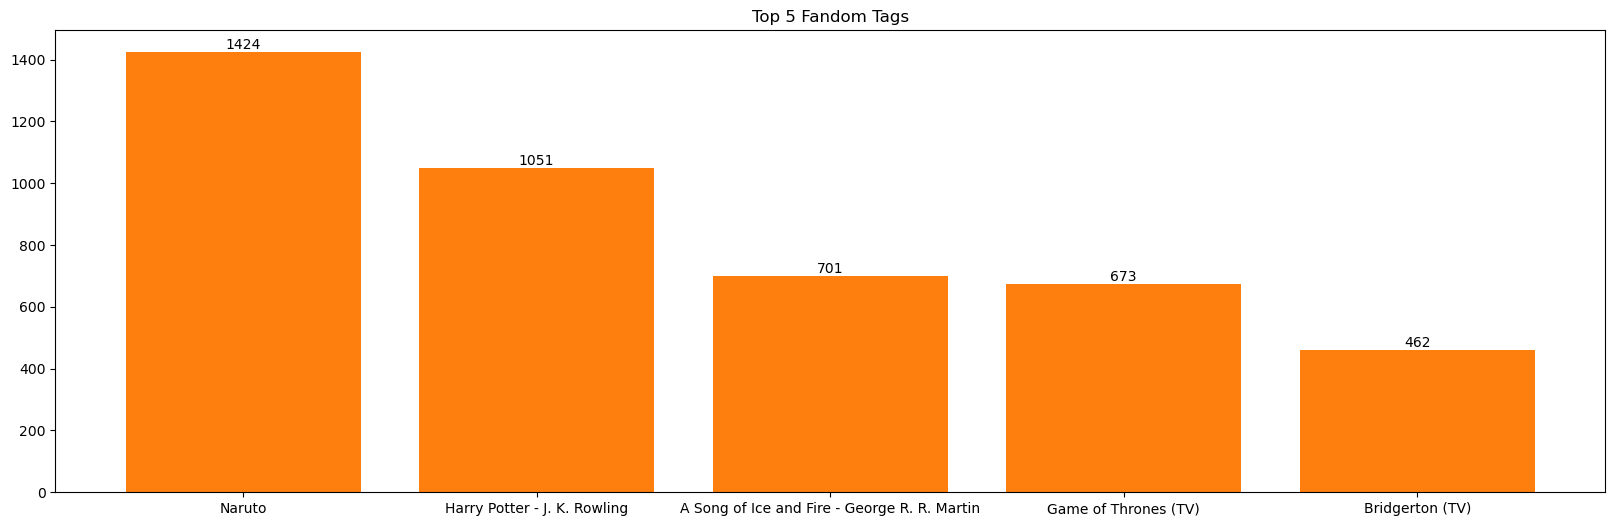

In [247]:
# Top 5 Fandom Tags
print(f"Top 10 Fandom Tags:\n{count_tags(ao3_df, 'Fandom Tags').head(10)}")
bar_chart_tags(ao3_df, 'Fandom Tags')

Top 10 Author Tags:
            Author  Counter
0   orphan_account      185
1        Anonymous      123
2       retromafia       65
3           Kalira       32
4            Orlha       31
5            amako       31
6  thekatthatbarks       30
7     MsPixiePixie       22
8         Mad_Mage       22
9     theformerone       20


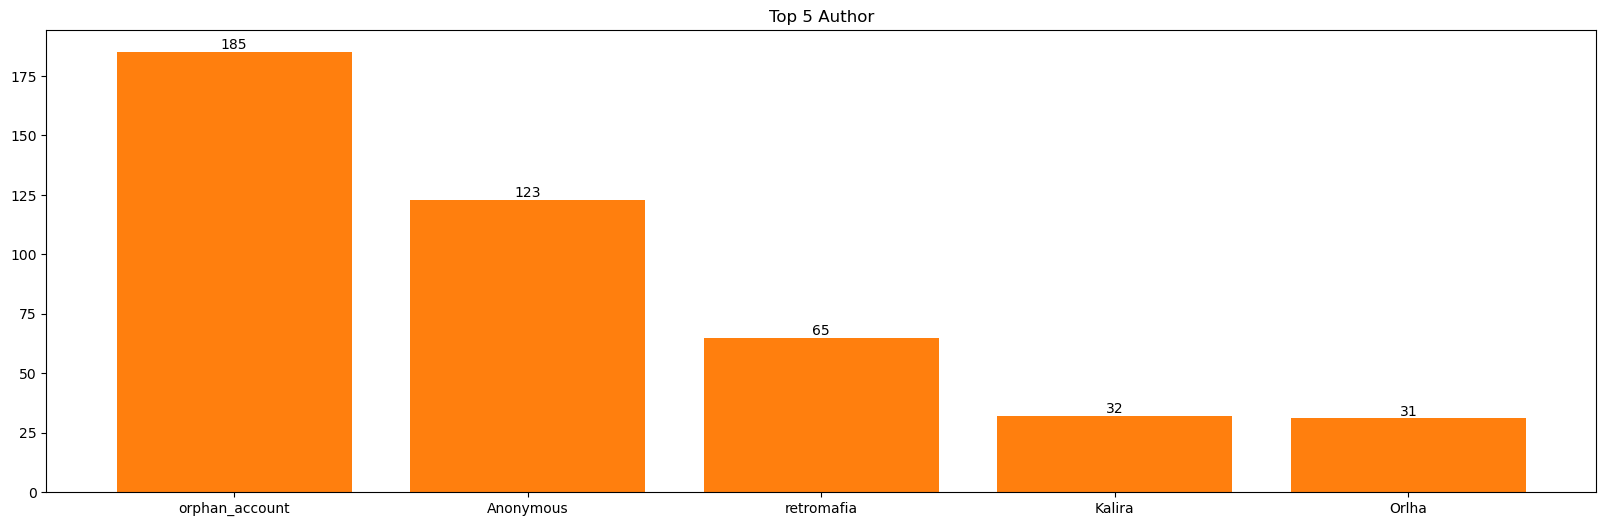

In [273]:
# Top 5 Author Tags
print(f"Top 10 Author Tags:\n{count_tags(ao3_df, 'Author').head(10)}")
bar_chart_tags(ao3_df, 'Author')

Top 10 Relationship Tags:
                           Relationship Tags  Counter
0               Haruno Sakura/Hatake Kakashi      329
1              Hermione Granger/Draco Malfoy      268
2                Haruno Sakura/Uchiha Sasuke      259
3                       No relationship tags      245
4             Haruno Sakura & Hatake Kakashi      238
5               Haruno Sakura/Nara Shikamaru      237
6    Colin Bridgerton/Penelope Featherington      221
7               Sherlock Holmes/Molly Hooper      194
8  Anthony Bridgerton/Penelope Featherington      185
9             Hermione Granger/Severus Snape      158


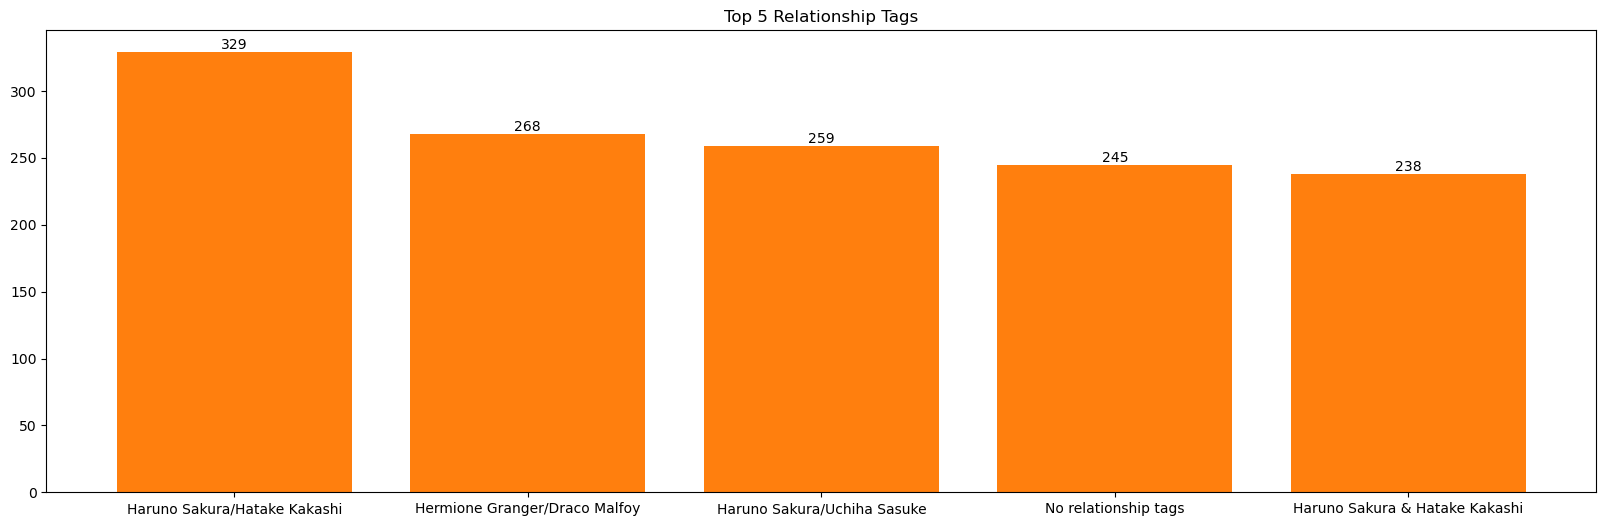

In [250]:
# Top 5 Relationship Tags
print(f"Top 10 Relationship Tags:\n{count_tags(ao3_df, 'Relationship Tags').head(10)}")
bar_chart_tags(ao3_df, 'Relationship Tags')

Top 10 Character Tags:
                 Character Tags  Counter
0                 Haruno Sakura     1459
1                        Reader      988
2                Hatake Kakashi      934
3              Hermione Granger      798
4                 Uchiha Sasuke      745
5                Uzumaki Naruto      685
6  Original Female Character(s)      573
7                  Harry Potter      548
8                   Sansa Stark      514
9           Original Characters      442


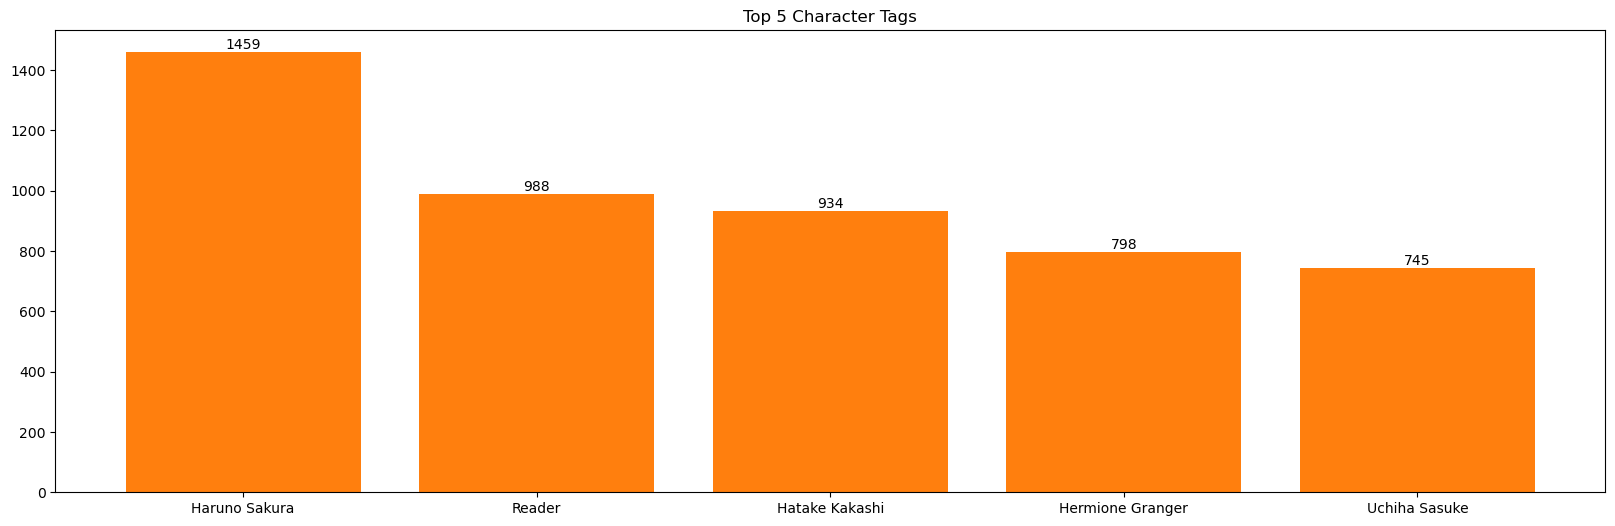

In [251]:
# Top 5 Character Tags
print(f"Top 10 Character Tags:\n{count_tags(ao3_df,'Character Tags').head(10)}")
bar_chart_tags(ao3_df, 'Character Tags')


Top 10 Freeform Tags:
:                           Freeform Tags  Counter
0  Alternate Universe - Canon Divergence     1332
1                                  Fluff     1254
2                                  Angst     1032
3                                   Smut      810
4                              Slow Burn      670
5                                Romance      650
6                           Hurt/Comfort      634
7                            Time Travel      530
8                        Fluff and Angst      442
9                     BAMF Haruno Sakura      387


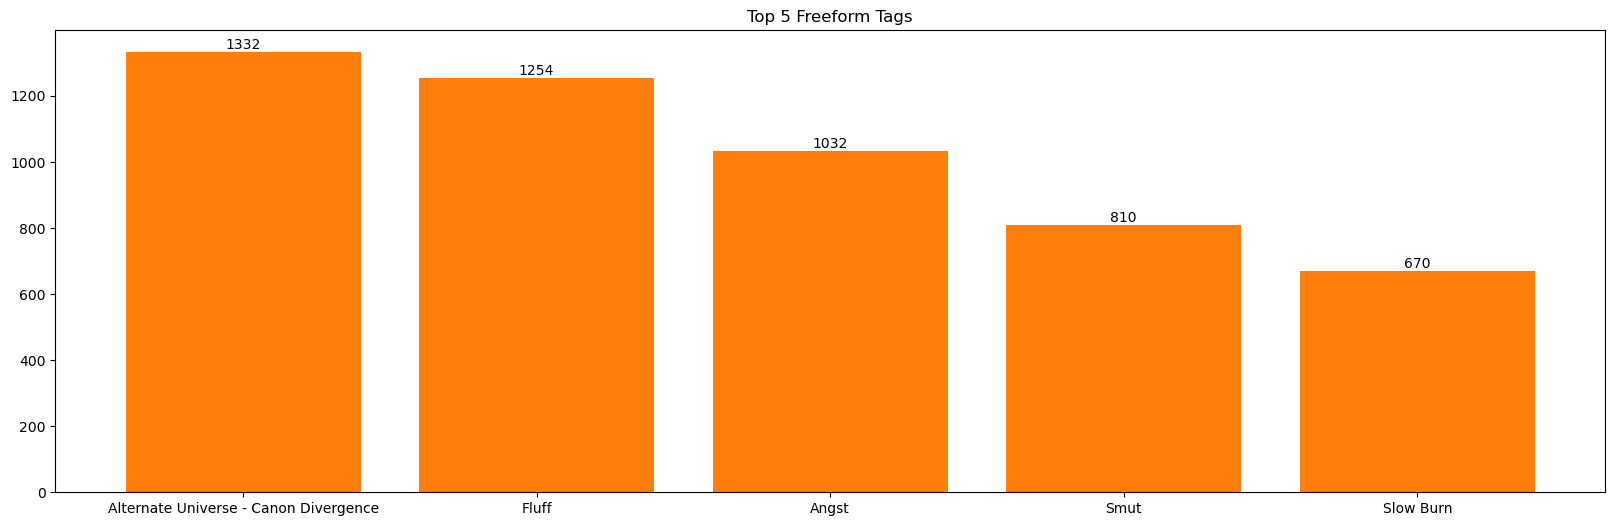

In [252]:
# Top 5 Freeform Tags
print(f"Top 10 Freeform Tags:\n:{count_tags(ao3_df, 'Freeform Tags').head(10)}")
bar_chart_tags(ao3_df, 'Freeform Tags')


In [267]:
# Correlation of my reading to the numerical columns
def correlation_tag(df, column):
    data= df.copy() 
    correlation= data[column].corr(data['Visited Count'])
    print(f"Correlation between {column} and Visited Count: {correlation:.2f}")
    # Plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[column], y=data["Visited Count"])
    plt.xlabel(column)
    plt.ylabel("Visited Count")
    plt.title(f"Does {column} Affect My Reading Behavior?")
    plt.show()
    return plt.show()

In [268]:
ao3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8169 entries, 0 to 8494
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              8169 non-null   object
 1   Author             8169 non-null   object
 2   Fandom Tags        8169 non-null   object
 3   Relationship Tags  8169 non-null   object
 4   Character Tags     8169 non-null   object
 5   Freeform Tags      8169 non-null   object
 6   Summary            8169 non-null   object
 7   Language           8169 non-null   object
 8   Chapters           8169 non-null   int32 
 9   Words              8169 non-null   int32 
 10  Collections        8169 non-null   int32 
 11  Kudos              8169 non-null   int32 
 12  Bookmarks          8169 non-null   int32 
 13  Hits               8169 non-null   int32 
 14  Comments           8169 non-null   int32 
 15  Link               8169 non-null   object
 16  Visited Count      8169 non-null   int64 
 17  

#### Correlation between the number tags

Correlation between Chapters and Visited Count: 0.29


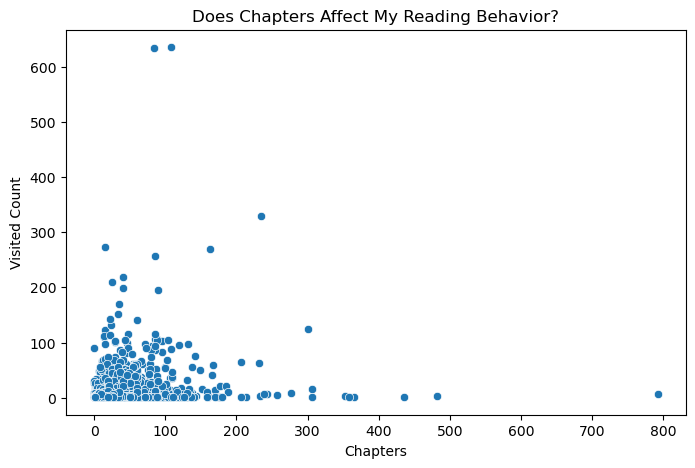

None
Correlation between Kudos and Visited Count: 0.20


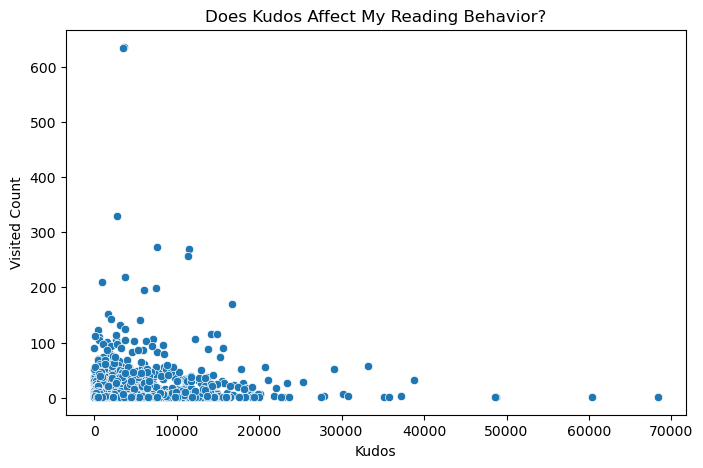

None
Correlation between Comments and Visited Count: 0.27


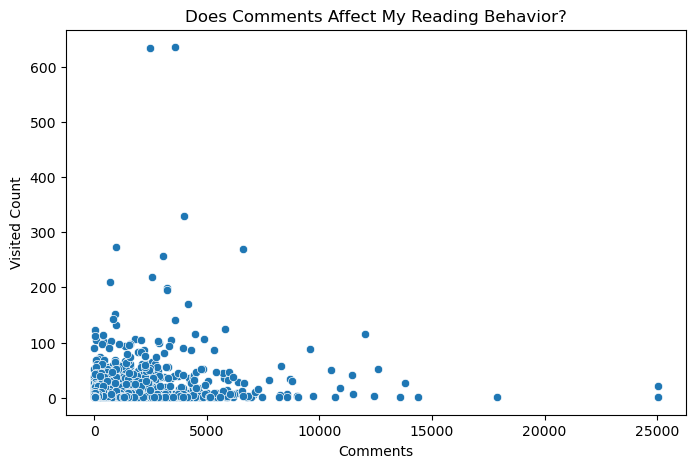

None
Correlation between Bookmarks and Visited Count: 0.19


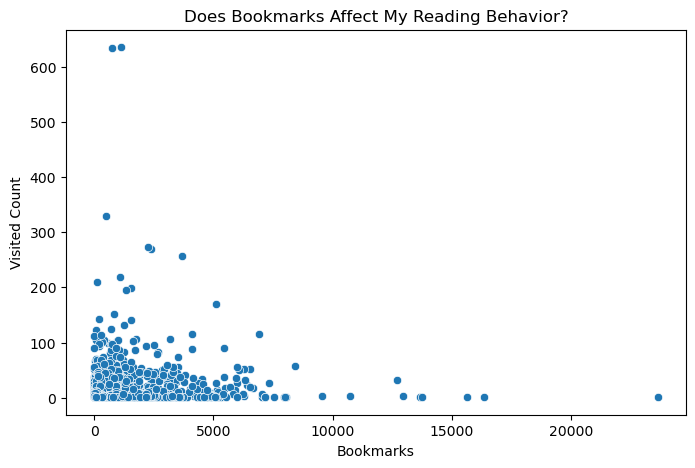

None
Correlation between Collections and Visited Count: 0.17


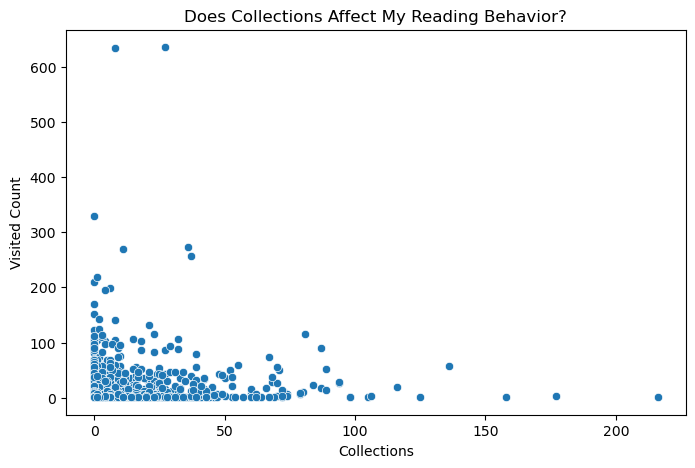

None
Correlation between Hits and Visited Count: 0.21


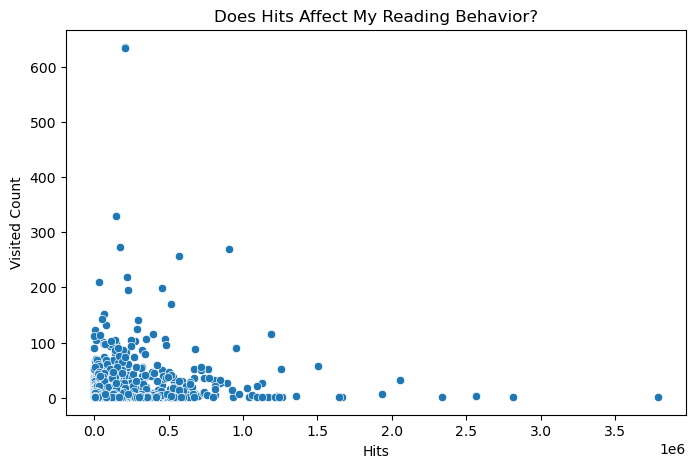

None
Correlation between Words and Visited Count: 0.25


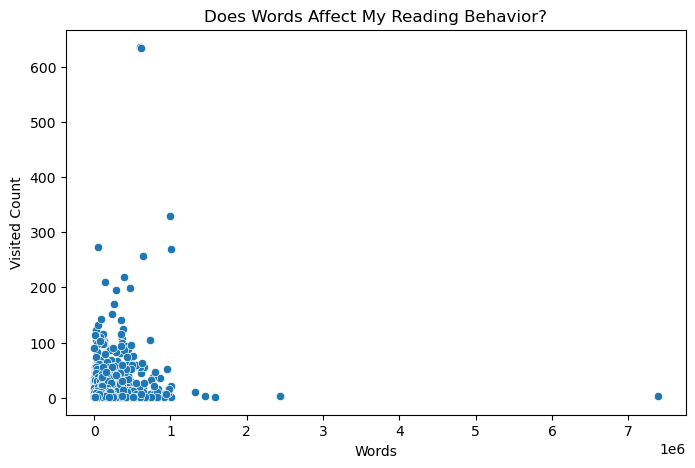

None


In [272]:
print(correlation_tag(ao3_df, 'Chapters'))
print(correlation_tag(ao3_df, 'Kudos'))
print(correlation_tag(ao3_df, 'Comments'))
print(correlation_tag(ao3_df, 'Bookmarks'))
print(correlation_tag(ao3_df, 'Collections'))
print(correlation_tag(ao3_df, 'Hits'))
print(correlation_tag(ao3_df, 'Words'))